# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

<img src="photos/question_1.1.jpg" width="400">
<img src="photos/question_1.2.jpg" width="400">
<img src="photos/question_1.3.jpg" width="500">

4. Yes, a non-decreasing transformation of the median remains the median for the transformed variable. Using the example example transformation 2 + 5 * X, where X = [1, 3, 5], we have an original median of 3. If we transform it to 2 + 5 * (3) = 17, when we transform the variable to [7, 17, 27], 17 remains our median. This works because the median is a measure of position within some variable. Thus, if we perform a non-decreasing transformation on an entire variable, all the values remain in the same position, preserving their order and thus the median.

    This statement still holds true for other quantiles besides the median (50th percentile) because all quantiles are a measure of position. No matter how complex the transformation, as long as it is non-decreasing, the order of our values will not change, so our transformed quantile does not change either.

    However, an IQR or range that has been non-decreasingly transformed will not equal the IQR or range of a transformed variable. This is because the IQR and range are not measures of position. Take the example in code below. Our transformed variable's IQR does not match the original IQR put through the same transformation function.

In [2]:
import pandas as pd

data = {"Values": [1, 2, 3, 4]}
df = pd.DataFrame(data)

# compute original IQR
original_iqr = df["Values"].quantile(.75) - df["Values"].quantile(.25)

# transform the variable
df["Values"] = 2 + 5 * df["Values"]

# recompute the IQR
print("Transformed variable's IQR: ", df["Values"].quantile(.75) - df["Values"].quantile(.25))

# apply transformation to original IQR
print("Transformed IQR: ", 2 + 5 * original_iqr)


Transformed variable's IQR:  7.5
Transformed IQR:  9.5


5. For a non-decreasing transformation g(), it is not always true that the mean of g(X) equals g of the mean(x). This relationship only holds for linear, non-decreasing transformations. Because the mean, like the range or IQR, is not a positional measure, transformations that change the relationships between data points affect statistics such as the mean. For linear transformations, all values are affected equally and our mean remains the same. However, non-linear transformations (like squaring) disrupt these relationships and impact the sum of the values, which affects the mean. This can be proven with a simple example below:

In [3]:
data = {"Values": [1, 2, 3, 4]}
df = pd.DataFrame(data)

df["Linear_Values"] = df["Values"] + 5
df["Squared_Values"] = df["Values"] ** 2

original_mean = df["Values"].mean()

# statement holds for linear, non-decreasing transformations ONLY
print("Linear transformation variable mean: ", df["Linear_Values"].mean())
print("Linear transformed original mean: ", original_mean + 5)
print()
print("Square transformation variable mean: ", df["Squared_Values"].mean())
print("Square transformed original mean: ", original_mean ** 2)

Linear transformation variable mean:  7.5
Linear transformed original mean:  7.5

Square transformation variable mean:  7.5
Square transformed original mean:  6.25


**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

2. The dataframe is 30478 x 13, so 30478 observations and 13 variables included. Each observation corresponds to an Airbnb listing, with the variables providing supplemental data on its host, location, ratings, layout, and price. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_airbnb = pd.read_csv('./data/airbnb_hw.csv')

print(df_airbnb.shape)

df_airbnb.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


3. When cross-tabulating these two variables, we can see that the most common listings are apartments with the entire unit being rented out. Private rooms in an apartment take a close second. Across all property types, however, shared rooms remain the least popular room type. Private rooms are more common than renting the entire property for bed & breakfasts, dorms, houses, huts, tents, treehouses, and other.

In [5]:
pd.crosstab(df_airbnb["Property Type"], df_airbnb["Room Type"])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


4. The data in these visualizations are quite poorly scaled, making it difficult to learn much about the dataset from an initial analysis. While the majority of rentals fall between $0-1000, the histogram is not granular enough to extract any further interpretation, and the same issue persists with the kernel density plot. When we analyze the initial box plot, we can also see many data points outside the whiskers, indicating that each point is beyond 1.5x the IQR. However, because of the nature of the dataset, it is natural for prices to be this high. It is possible there exist a number of luxury rentals with outlier prices.

NaN prices:  0
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: cleaned_price, dtype: float64


[Text(0.5, 1.0, 'Airbnb Listing Count by Price'),
 Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Count')]

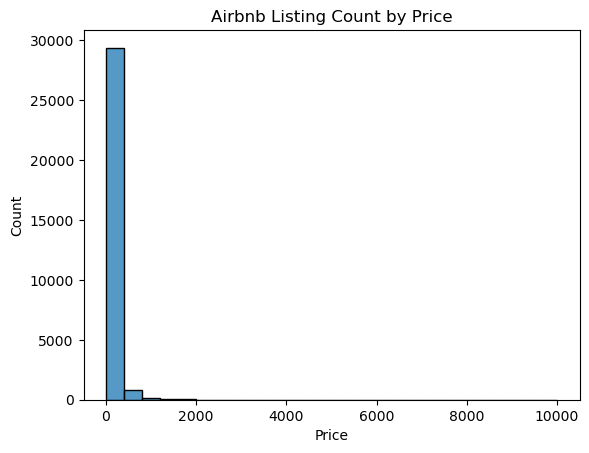

In [6]:
# clean "Price" variable
df_airbnb["cleaned_price"] = df_airbnb["Price"].str.replace(",", "")
df_airbnb["cleaned_price"] = pd.to_numeric(df_airbnb["cleaned_price"], errors="coerce")
df_airbnb_cleaned = df_airbnb[df_airbnb['cleaned_price'] > 0]

# no NaN values
print("NaN prices: ", df_airbnb_cleaned["cleaned_price"].isna().sum())

# statistical description
print(df_airbnb_cleaned["cleaned_price"].describe())

# histogram
fig = sns.histplot(df_airbnb_cleaned["cleaned_price"], bins=25)
fig.set(title='Airbnb Listing Count by Price',
xlabel='Price', 
ylabel='Count')

[Text(0.5, 1.0, 'Airbnb Listing Density by Price'),
 Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Density')]

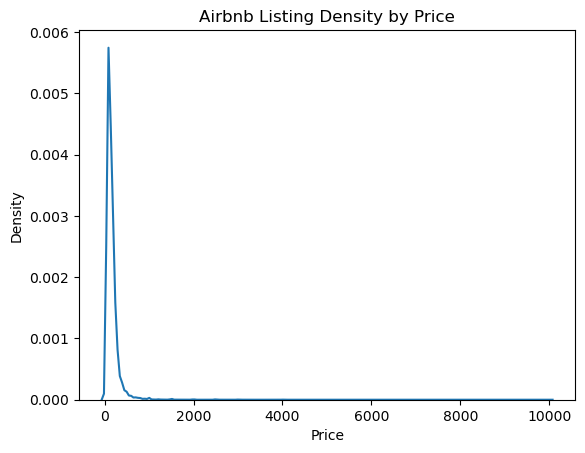

In [7]:
# kernel density plot
fig = sns.kdeplot(df_airbnb_cleaned["cleaned_price"])
fig.set(title='Airbnb Listing Density by Price',
xlabel='Price', 
ylabel='Density')

[Text(0.5, 1.0, 'Boxplot of Airbnb Prices'), Text(0, 0.5, 'Price')]

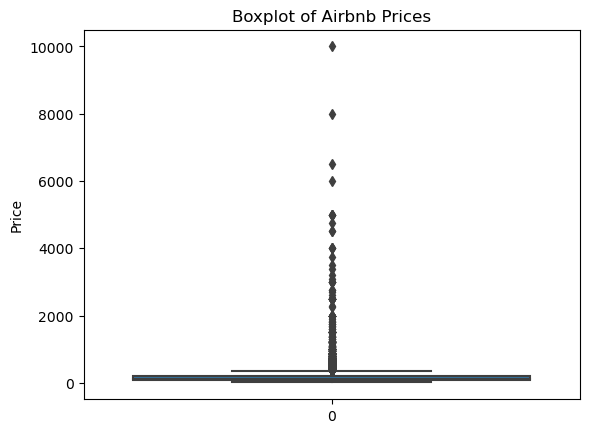

In [8]:
# box plot
fig = sns.boxplot(df_airbnb_cleaned["cleaned_price"])
fig.set(title='Boxplot of Airbnb Prices', 
ylabel='Price')

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64


[Text(0.5, 1.0, 'Airbnb Listing Count by Price'),
 Text(0.5, 0, 'Price (log scale)'),
 Text(0, 0.5, 'Count')]

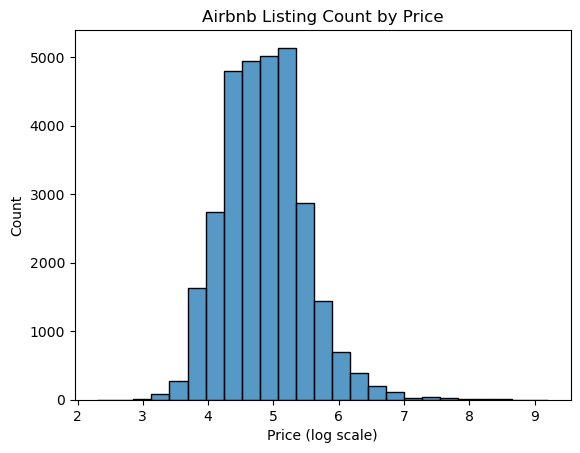

In [9]:
df_airbnb_cleaned["price_log"] = np.log(df_airbnb_cleaned["cleaned_price"])

# description
print(df_airbnb_cleaned["price_log"].describe())

# histogram
fig = sns.histplot(df_airbnb_cleaned["price_log"], bins=25)
fig.set(title='Airbnb Listing Count by Price',
xlabel='Price (log scale)', 
ylabel='Count')

[Text(0.5, 1.0, 'Airbnb Listing Density by Price'),
 Text(0.5, 0, 'Price (log scale)'),
 Text(0, 0.5, 'Density')]

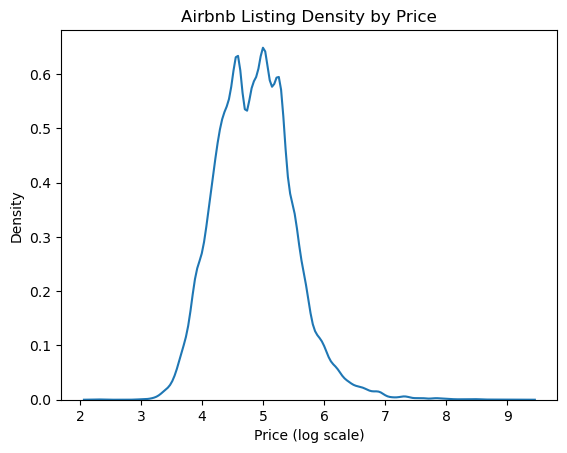

In [10]:
# kernel density plot
fig = sns.kdeplot(df_airbnb_cleaned["price_log"])
fig.set(title='Airbnb Listing Density by Price',
xlabel='Price (log scale)', 
ylabel='Density')

[Text(0.5, 1.0, 'Boxplot of Airbnb Prices'), Text(0, 0.5, 'Price (log scale)')]

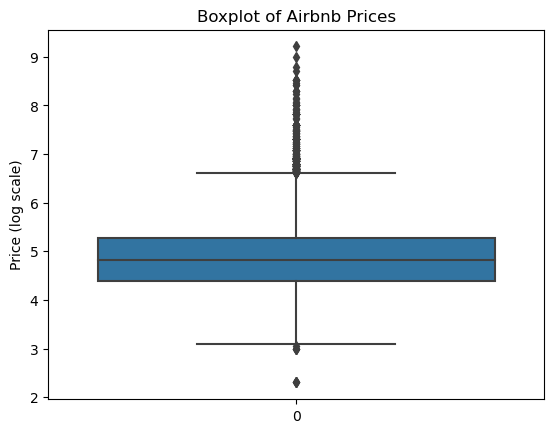

In [11]:
# box plot
fig = sns.boxplot(df_airbnb_cleaned["price_log"])
fig.set(title='Boxplot of Airbnb Prices', 
ylabel='Price (log scale)')

5. After creating our scatterplot with the number of beds on the x-axis and the price on the y-axis, some slight correlations can be seen. For instance, as the number of beds increases, the spread of prices seem to narrow down, aside from a handful of outliers. Additionally, there seem to be fewer prices/listings available as the number of beds increases. Of course, scatterplots run the risk of misleading interpretation due to overlapping/hidden data points. Only when grouping these variables by bed count can we see more granular statistics. As we increase the number of beds, we also see an increase in average price. A similar pattern can be observed for the standard deviation. As the number of beds increase, the standard deviation/spread of prices either remains the same or increases, aside from listings with 9 & 10 beds.

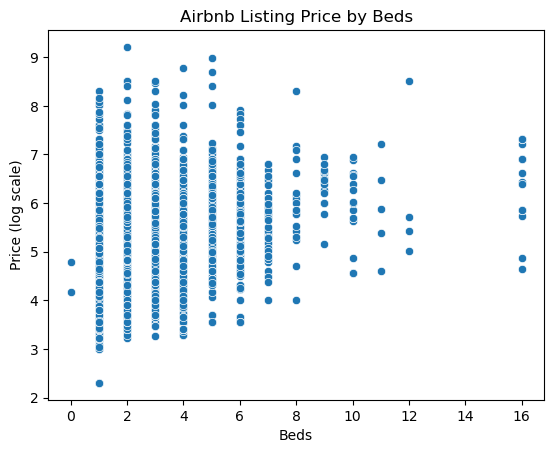

price_log                                                              \
         count      mean       std       min       25%       50%       75%   
Beds                                                                         
0.0        2.0  4.476755  0.427613  4.174387  4.325571  4.476755  4.627939   
1.0    20344.0  4.686977  0.539666  2.302585  4.317488  4.605170  5.043425   
2.0     6610.0  5.094504  0.580425  3.218876  4.744932  5.075174  5.416100   
3.0     2071.0  5.340837  0.644742  3.258097  4.941642  5.298317  5.703782   
4.0      783.0  5.480463  0.721360  3.295837  5.010635  5.509388  5.926926   
5.0      284.0  5.669484  0.735623  3.555348  5.245705  5.669881  6.109248   
6.0      177.0  5.651790  0.824358  3.555348  5.293305  5.616771  6.052089   
7.0       45.0  5.617009  0.693481  4.007333  5.176150  5.703782  6.098074   
8.0       24.0  5.956200  0.862418  4.007333  5.495121  5.857933  6.176138   
9.0       15.0  6.341645  0.461176  5.164786  6.098011  6.476972  6.636468   
10.0      16.0  5.945514  0.762220  4.553877  5.673034  6.009872  6.559853   
11.0       5.0  5.913390  0.996967  4.605170  5.393628  5.883322  6.476972   
12.0       4.0  6.161928  1.595714  5.010635  5.314734  5.559941  6.407135   
16.0      13.0  6.312746  0.877963  4.644391  5.857933  6.437752  6.907755   

                
           max  
Beds            
0.0   4.779123  
1.0   8.294050  
2.0   9.210340  
3.0   8.517193  
4.0   8.779557  
5.0   8.987197  
6.0   7.919356  
7.0   6.802395  
8.0   8.294050  
9.0   6.956545  
10.0  6.956545  
11.0  7.207860  
12.0  8.517193  
16.0  7.313220

In [12]:
fig = sns.scatterplot(y=df_airbnb_cleaned["price_log"], x=df_airbnb_cleaned["Beds"])
fig.set(title='Airbnb Listing Price by Beds',
xlabel='Beds', 
ylabel='Price (log scale)')
plt.show()

df_airbnb_cleaned.loc[:,["price_log", "Beds",]].groupby(["Beds"]).describe()

6. We can construct the scatterplot by setting the hue to the room type variable and the style of the data points to the property type. From the generated scatterplot, we can see that listings with the entire apartment/house tend to have higher prices, regardless of the number of beds, followed by private rooms and shared rooms. With respect to property type, an increase in the number of beds corresponds with an increase in the number of house listings, and vice versa for apartments.

    After grouping the data by room and property type and computing a description of the price variable, we can see that for listings of the entire home/apartment, lofts, villas, and "other" have the highest average prices. "Other", villas, and houses also have the highest standrd deviation. For private rooms, castles, "other", tents, and villas comprise the highest price averages, while "other", lofts, and tents have the highest standard deviations. And for shared rooms, treehouses, "other", and bed & breakfasts have the highest price averages, whereas houses, bed & breakfasts, and "other" have the highest standard deviations.

    From an analysis of the mean/median values for property/room types, a vast majority of the data have higher means than medians. However, given the nature of this dataset, this is understandable, as outlier Airbnb listings inflate the mean price of a property/room type. As such, we can rely on the median to have a more reliable estimate of central tendency and avoid these outlier values. 

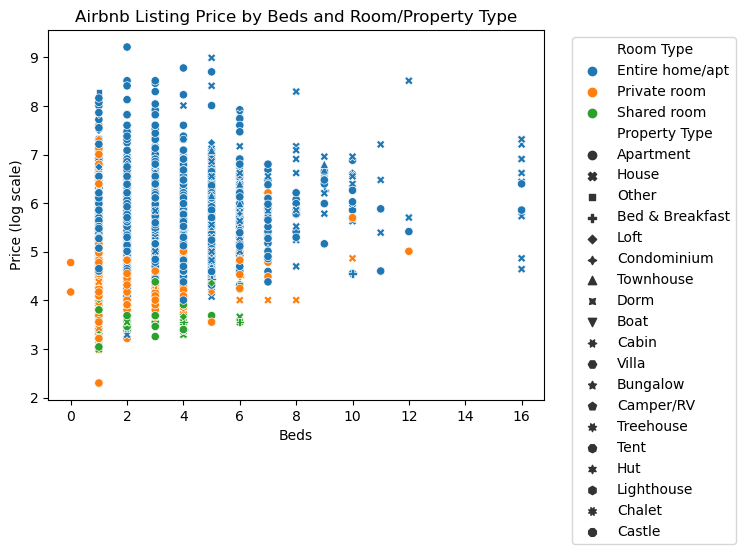

cleaned_price                                  \
                                        count        mean          std    min   
Room Type       Property Type                                                   
Entire home/apt Apartment             15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast          13.0  184.538462   119.814172   85.0   
                Boat                      7.0  158.428571    51.110524  100.0   
                Bungalow                  4.0  150.750000    46.464144   87.0   
                Cabin                     1.0  250.000000          NaN  250.0   
                Camper/RV                 6.0  114.333333   107.685963   45.0   
                Condominium              72.0  304.861111   266.197497   80.0   
                Dorm                      4.0   44.250000    24.060687   30.0   
                House                   752.0  297.263298   468.409428   27.0   
                Lighthouse                1.0   39.000000          NaN   39.0   
                Loft                    392.0  330.510204   321.519721   55.0   
                Other                    14.0  843.428571  1133.062271   66.0   
                Townhouse                83.0  280.783133   314.605252   66.0   
                Villa                     4.0  529.750000   650.963581  120.0   
Private room    Apartment             10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast         155.0   97.161290    47.031971   32.0   
                Boat                      1.0  120.000000          NaN  120.0   
                Cabin                     1.0   80.000000          NaN   80.0   
                Camper/RV                 1.0   39.000000          NaN   39.0   
                Castle                    1.0  150.000000          NaN  150.0   
                Chalet                    1.0   99.000000          NaN   99.0   
                Condominium              22.0   98.590909    40.576394   46.0   
                Dorm                     16.0   86.562500    40.738137   50.0   
                House                  1258.0   77.750397    49.402650   25.0   
                Hut                       2.0   75.000000    35.355339   50.0   
                Loft                    312.0  108.057692   128.817912   39.0   
                Other                    29.0  211.931034   235.404505   39.0   
                Tent                      4.0  126.250000    94.989034   40.0   
                Townhouse                52.0   83.365385    30.578109   45.0   
                Treehouse                 1.0   95.000000          NaN   95.0   
                Villa                     4.0  126.250000    71.107313   60.0   
Shared room     Apartment               685.0   79.200000    67.720849   20.0   
                Bed & Breakfast          12.0  143.666667   245.328104   30.0   
                Dorm                     11.0   73.181818    46.328864   30.0   
                House                    80.0   77.487500   275.409936   10.0   
                Loft                     49.0   78.816327    87.521824   30.0   
                Other                     4.0  148.750000   134.806961   70.0   
                Townhouse                 1.0   95.000000          NaN   95.0   
                Treehouse                 3.0  167.666667   114.788211   95.0   

                                                                  
                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominiu

In [13]:
fig = sns.scatterplot(data=df_airbnb_cleaned, y="price_log", x="Beds", hue="Room Type", style="Property Type")
fig.set(title='Airbnb Listing Price by Beds and Room/Property Type',
xlabel='Beds', 
ylabel='Price (log scale)')
sns.move_legend(fig, "upper right", bbox_to_anchor=(1.4, 1))
plt.show()

df_airbnb_cleaned.loc[:,["Room Type", "Property Type", "cleaned_price"]].groupby(["Room Type", "Property Type"]).describe()

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

1. There are 623 observations and 10 variables. The numeric data is not being correctly read for all variables. For variables with "Not Available" as a possible value, as well as the "Active Well Service Rig Count (Number of Rigs)" variable, the numeric values are stored as strings. This requires us to convert them back to numeric values with pandas, coercing any uncastable values to be NaN. Also, as a precaution, we can remove any "," characters for values >999.

In [14]:
df_drilling = pd.read_csv("./data/drilling_rigs.csv")
print("Dataframe dimensions: ", df_drilling.shape)

columns_to_clean = ["Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",
                    "Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",
                    "Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",
                    "Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",
                    "Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",
                    "Active Well Service Rig Count (Number of Rigs)"]

for col in columns_to_clean:
    # remove potential "," characters and convert to numeric, handling non-numeric values with NaN
    df_drilling[col] = df_drilling[col].str.replace(",", "")
    df_drilling[col] = pd.to_numeric(df_drilling[col], errors="coerce")

df_drilling.head()

Dataframe dimensions:  (623, 10)


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,NaN,NaN,NaN,NaN,NaN,1219,1549.0
1,1973 February,1037,89,NaN,NaN,NaN,NaN,NaN,1126,1677.0
2,1973 March,959,90,NaN,NaN,NaN,NaN,NaN,1049,1805.0
3,1973 April,914,79,NaN,NaN,NaN,NaN,NaN,993,1898.0
4,1973 May,974,72,NaN,NaN,NaN,NaN,NaN,1046,1991.0


In [15]:
# 3.2, cannot recognize "mixed" format, used "%Y %B" format instead
df_drilling["time"] = pd.to_datetime(df_drilling["Month"], format="%Y %B")

3. When we create a line plot for this variable, we can see a sharp rise in rigs up until right past the 1980s, where a steady general decline begins and continues to this day. Throughout this decline, interestingly, there are brief stages of sharp spikes to the rig count, followed by dramatic falls. 

[Text(0.5, 1.0, 'Number of Well Service Rigs Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Active Well Service Rig Count')]

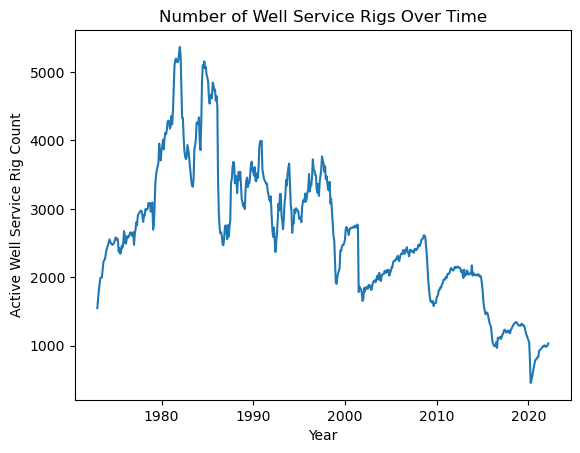

In [16]:
var = "Active Well Service Rig Count (Number of Rigs)"
fig = sns.lineplot(data=df_drilling, x="time", y=var)
fig.set(title="Number of Well Service Rigs Over Time",
xlabel="Year",
ylabel="Active Well Service Rig Count")

4. After computing the first difference for this variable and plotting it over time, we can see the change in rig count over time. At an initial glance, the differences fluctuate around 0 over time, despite there being sharp spikes or drops in differences in the mid 1980s and early 2000s. Over time, the variability of the rig count has also decreased, with the counts being more and more centered around 0 as we progress into the 21st century. Because the differences in rig count over time remain centered around 0, we can reason that the data's main statistics (ex. mean) do not change over time. Thus, we can categorize this series as stationary.

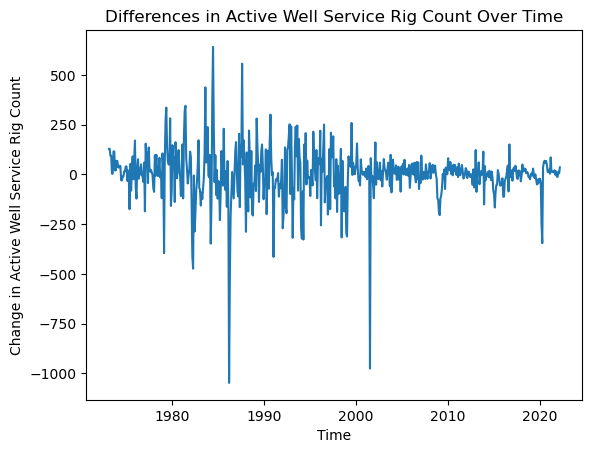

In [17]:
y = df_drilling["Active Well Service Rig Count (Number of Rigs)"].to_numpy()
t = len(y)

# calculate first difference
# vector of differences for each pair of adjacent months
diff = y[1:]-y[:(t-1)]

fig = sns.lineplot(x=df_drilling["time"][1:], y=diff)
fig.set(title='Differences in Active Well Service Rig Count Over Time',
xlabel="Time",
ylabel="Change in Active Well Service Rig Count")
plt.show()

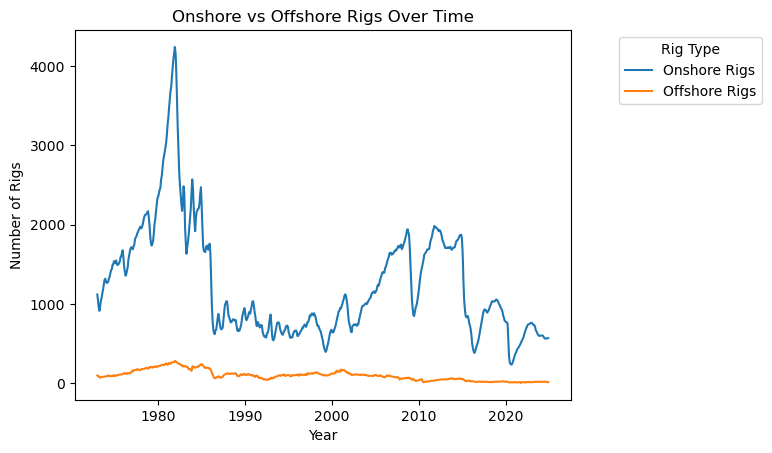

In [18]:
# 3.5 melted series of onshore/offshore rigs

# new df with only the variables we want to melt and the time
var1 = "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)"
var2 = "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"

df_drilling_subset = df_drilling[["time", var1, var2]].rename(
    columns={
        var1: "Onshore Rigs",
        var2: "Offshore Rigs"
    }
)

df_melted = df_drilling_subset.melt(id_vars="time",
                                    var_name="Rig Type",
                                    value_name="Rig Count")

fig = sns.lineplot(data=df_melted, x="time", y="Rig Count", hue="Rig Type")
fig.set(title="Onshore vs Offshore Rigs Over Time", 
        xlabel="Year", 
        ylabel="Number of Rigs")
sns.move_legend(fig, "upper right", bbox_to_anchor=(1.4, 1))
plt.show()